In [ ]:
''' List of satellites from KPNO allsky images
11/1 09:48:05 UT, 03:28:05 UT
11/9 12:20:05 UT
11/15 01:36:05 UT, 01:38:05 UT, 01:40:05 UT, 01:46:05 UT, 01:50:05 UT, 02:04:05 UT '''

In [1]:
%pylab inline
pylab.rcParams['figure.figsize'] = 7, 7

import skyfield.api
from skyfield.api import load, Topos, utc
import pytz
from pytz import timezone

Populating the interactive namespace from numpy and matplotlib


In [2]:
from astral import Astral, Location, AstralGeocoder as ag

In [3]:
eastern = timezone('US/Eastern')
ts = load.timescale()

In [4]:
sats = load.tle('https://celestrak.com/NORAD/elements/stations.txt')
#had to use ISS since tiangong is no longer on the list???
iss = sats['ISS (ZARYA)']


In [5]:
#two days, starting at 2019/9/1 1800 utc
minutes = range(60*24*2)
print(minutes)
t = ts.utc(2018, 9, 1, 18, minutes)
print(t)

range(0, 2880)
<Time tt=[2458363.250800741 ... 2458365.2501062965] len=2880>


In [6]:
#compute ISS position relative to irvine
irvine = Topos(latitude = 33.6846, longitude = -117.8265)
orbit = (iss - irvine).at(t)
alt, az, dist = orbit.altaz()

In [7]:
above_horizon = alt.degrees > 0
print(above_horizon)

[False False False ... False False False]


In [8]:
indicies, = above_horizon.nonzero()
print(indicies)

[  45   46   47   48   49   50   51   52   53   54   55  145  146  147
  948  949  950  951  952  953  954  955  956  957  958 1045 1046 1047
 1048 1049 1050 1051 1052 1053 1054 1145 1146 1147 1148 1149 1150 1244
 1245 1246 1247 1248 1340 1341 1342 1343 1344 1345 1346 1347 1348 1437
 1438 1439 1440 1441 1442 1443 1444 1445 1446 1535 1536 1537 1538 1539
 1540 1541 2340 2341 2342 2343 2344 2345 2346 2347 2348 2349 2436 2437
 2438 2439 2440 2441 2442 2443 2444 2445 2446 2535 2536 2537 2538 2539
 2540 2541 2542 2635 2636 2637 2638 2639 2732 2733 2734 2735 2736 2737
 2738 2739 2828 2829 2830 2831 2832 2833 2834 2835 2836 2837 2838]


In [9]:
boundaries, = diff(above_horizon).nonzero()
print(boundaries)

[  44   55  144  147  947  958 1044 1054 1144 1150 1243 1248 1339 1348
 1436 1446 1534 1541 2339 2349 2435 2446 2534 2542 2634 2639 2731 2739
 2827 2838]


In [10]:
passes = boundaries.reshape(len(boundaries) // 2, 2)
print(passes)
print(len(passes))
i, j = passes[0]
print(i)

[[  44   55]
 [ 144  147]
 [ 947  958]
 [1044 1054]
 [1144 1150]
 [1243 1248]
 [1339 1348]
 [1436 1446]
 [1534 1541]
 [2339 2349]
 [2435 2446]
 [2534 2542]
 [2634 2639]
 [2731 2739]
 [2827 2838]]
15
44


In [11]:
def plot_sky(pass_indicies):
    i, j = pass_indicies
    print('Rises:', t[i].astimezone(eastern))
    print('Sets:', t[j].astimezone(eastern))
    
    #set up the polar plot
    plt.figure()
    ax = plt.subplot(111, projection = 'polar')
    ax.set_rlim([0, 90])
    ax.set_theta_zero_location('N')
    ax.set_theta_direction(-1)
    
    theta = az.radians
    r = 90 - alt.degrees
    ax.plot(theta[i:j], r[i:j], 'ro--')
    for k in range(i, j):
        text = t[k].astimezone(eastern).strftime('%H"%M')
        ax.text(theta[k], r[k], text, ha = 'right', va = 'bottom')

In [ ]:
for i in range(0, len(passes)):
    plot_sky(passes[i])

In [ ]:
plot_sky

#### Astral example

In [12]:
a = Astral()
city_name = 'Phoenix'
city = Location()
city.name = 'Kitt Peak'
city.region = 'America'
city.latitude = 31.9599
city.longitude = -111.5997
city.timezone = 'US/Pacific'
city.elevation = 2120
print(city)


Kitt Peak/America, tz=US/Pacific, lat=31.96, lon=-111.60


In [15]:
date = datetime.datetime(2019, 9, 1, 4, 0, 0)
sun = city.sun(date=datetime.date(2019, 9, 1), local = True)
sun2 = city.sun(date=datetime.date(2019, 9, 1), local = False)
print('Dawn:" %s' %str(sun['dawn']))  #civil twilight
print('Sunrise:" %s' %str(sun['sunrise']))
print('Noon:" %s' %str(sun['noon']))
print('Sunset:" %s' %str(sun['sunset']))
print('Dusk:" %s' %str(sun['dusk']))  #civil twilight
print('Dawn:', (sun['dawn']))
print('Dawn:', (sun2['dawn']))
civil_twilight = sun['dawn'].replace(tzinfo=None)
civil_twilight2 = sun2['dawn']
# civil_twilight += datetime.timedelta(hours = 7)
print(civil_twilight)
# civil_twilight_h = civil_twilight.strftime('%H')
# print(civil_twilight_h)
naive = civil_twilight2.replace(tzinfo = None)
# naive = naive.replace(tzinfo = pytz.utc)
print(naive)
# if naive > date:
#     print(date, naive)

Dawn:" 2019-09-01 05:32:50-07:00
Sunrise:" 2019-09-01 05:57:49-07:00
Noon:" 2019-09-01 12:26:39-07:00
Sunset:" 2019-09-01 18:55:30-07:00
Dusk:" 2019-09-01 19:20:28-07:00
Dawn: 2019-09-01 05:32:50-07:00
Dawn: 2019-09-01 12:32:50+00:00
2019-09-01 05:32:50
2019-09-01 12:32:50


## now do this for starlink over KPNO

In [101]:
def get_passes(num_days, month, day, hour, lat, lon, elevation, alt_cutoff = 0, sat_name = None):
    '''num_days is the number of days to cacluate satellite passes
    month, day, hour, are used to build the start date datetime object in skyfield
    lat is the latitude of the location in degrees
    lon is the longitude of the location in degrees
    elevation is the elevation of the location in meters
    alt_cutoff is the cutoff altitude for satellites in degrees. 0 alt is the horizon which is default. DESI cutoff would be ~30 deg
    sat_name is the name of the specific satellite as a string. 
        Defaults to None but I haven't been able to make it work for None yet. None would be all satellites in the tle file.
        Currently Must specify a name. ex: 'STARLINK-31'
    '''
    #loading the timescale from skyfield
    ts = load.timescale()
    
    #using astral for a quicker calculation than ephem.
    a = Astral()
    city = Location()
    city.latitude = float(lat)
    city.longitude = float(lon)
    city.elevation = float(elevation)
    #local=False gives UTC time, local = True gives local time + UTC Offset
    sun = city.sun(date=datetime.date(2019, month, day), local = False) 
    
    #calculating sunrise time and putting it into a skyfield timescale object
    sun_rise = sun['sunrise'].replace(tzinfo = None)
#     sun_rise = ts.utc(sun_rise)
    sun_rise = ts.utc(sun_rise.year, sun_rise.month, sun_rise.day, sun_rise.hour, sun_rise.minute, sun_rise.second)
#     sun_rise = sun_rise.replace(tzinfo = pytz.utc)

    #calculating sunset time and putting it into a skyfield timescale object
    sun_set = sun['sunset'].replace(tzinfo = None)
    sun_set = ts.utc(sun_set.year, sun_set.month, sun_set.day, sun_set.hour, sun_set.minute, sun_set.second)
    
    #calculating dawn and dusk times in case i wnat to use those instead of sunrise and sunset
#     sun_set = sun_set.replace(tzinfo = pytz.utc)
#     sun_dawn = sun['dawn'].replace(tzinfo = None)
#     sun_dawn = ts.utc(sun_dawn.year, sun_dawn.month, sun_dawn.day, sun_dawn.hour, sun_dawn.minute, sun_dawn.second)
# #     sun_dawn = sun_dawn.replace(tzinfo = pytz.utc)
#     sun_dusk = sun['dusk'].replace(tzinfo = None)
#     sun_dusk = ts.utc(sun_dusk.year, sun_dusk.month, sun_dusk.day, sun_dusk.hour, sun_dusk.minute, sun_dusk.second)
#     sun_dusk = sun_dusk.replace(tzinfo = pytz.utc)
    
    data = []
    
    
    #setting the timezone to arizona
    arizona = timezone('US/Arizona')
    utc = timezone('UTC')
    
    year = 2019
    minutes = range(24*60*num_days)
    time = ts.utc(year, month, day, hour, minutes)
    
    #location you are calculating from
    location = skyfield.toposlib.Topos(latitude_degrees = lat, longitude_degrees = lon, elevation_m = elevation)
    
    #loading the starlink file from celestrak
    sats = load.tle('http://celestrak.com/NORAD/elements/starlink.txt')
    
    #calculations for sunrise/sunset times

    
    if sat_name is not None:
        sat = sats[str(sat_name)]
        difference = sat-location
        topocentric = difference.at(time)
        alt, az, dist = topocentric.altaz()
        ra, dec, dist = topocentric.radec()
        sat_array = [sat.name, alt, az, ra, dec]
        data.append(sat_array)
#     else:
#         #calculating for starlink satellites in sats
#         for sat in sats:
#             difference = sat - location
#             topocentric = difference.at(time)
#             alt, az, dist = topocentric.altaz()
#             ra, dec, dist = topocentric.radec()
#             sat_array = [sat.name, alt, az, ra, dec]
#             data.append(sat_array)
    
#     visible = data[0].degrees > alt_cutoff #this will not work for the loop. going to have to write it into the loop
    visible = alt.degrees > alt_cutoff
    boundaries, = diff(visible).nonzero()
    print(boundaries)
    passes = boundaries.reshape(len(boundaries) // 2, 2)
    
    for row in range(0, len(passes)):
        i, j = passes[row]
#         print('Rises:', time[i].astimezone(utc))
#         print('Sets:', time[j].astimezone(utc))
        
#         sat_rise = ts.utc(year, month, day, hour, i)
#         sat_rise = sat_rise.replace(tzinfo = utc)
#         hour_i = i//60
#         min_i = i%60
#         hour_j = j//60
#         min_j = j%60
        
#         assert hour_i * 60 + min_i == i
#         assert hour_j * 60 + min_j == j
    
#         sat_rise = datetime.datetime(year, month, day, hour_i, min_i)
#         sat_rise = sat_rise.replace(tzinfo = utc)
#         sat_set = datetime.datetime(year, month, day, hour_j, min_j)
#         sat_set = sat_set.replace(tzinfo = utc)


        #using skyfield to create satellite rise and set times instead of python datetime
        sat_rise = ts.utc(year, month, day, hour, i)
        sat_set = ts.utc(year, month, day, hour, j)
        
        
        ### cannot do this with skyfield ts objects. gets an error of cannot do this operation between Time and Time object (or something similar)
#         if sat_rise < sun_rise and sat_rise > sun_set:
        print('Rises:', sat_rise)
        print('Sets:', sat_set)

        #set up the polar plot
        plt.figure(figsize = (5, 5))
        ax = plt.subplot(111, projection = 'polar')
        ax.set_rlim([0, 90])
        ax.set_theta_zero_location('N')
        ax.set_theta_direction(-1)
        ax.set_thetagrids((0, 90, 180, 270), ('N', 'E', 'S', 'W'))
        ax.set_rticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90])
        ax.set_yticklabels(map(str, range(90, 0, -10)))
        ax.set_title(f'Satellite {sat.name} Rises: {sat_rise.utc_datetime()} Sets: {sat_set.utc_datetime()}')

        theta = az.radians
        r = 90 - alt.degrees
        ax.plot(theta[i:j], r[i:j], 'ro--')
        for k in range(i, j):
            text = time[k].astimezone(utc).strftime('%H:%M')
            ax.text(theta[k], r[k], text, ha = 'right', va = 'bottom')

    return data

In [6]:
#list of names of satellites
sat_names = []
sats = load.tle('http://celestrak.com/NORAD/elements/starlink.txt')
# print(sats)
for i in sats:
#     print(sats[i].name)
    name = sats[i].name
    sat_names.append(name)
# print(sat_names)

new_sat_names = list(dict.fromkeys(sat_names))
print(new_sat_names)

['STARLINK-31', 'STARLINK-22', 'STARLINK-23', 'STARLINK-24', 'STARLINK-25', 'STARLINK-26', 'STARLINK-27', 'STARLINK-28', 'STARLINK-29', 'STARLINK-30', 'STARLINK-21', 'STARLINK-46', 'STARLINK-33', 'STARLINK-34', 'STARLINK-61', 'STARLINK-36', 'STARLINK-37', 'STARLINK-71', 'STARLINK-39', 'STARLINK-32', 'STARLINK-66', 'STARLINK-42', 'STARLINK-43', 'STARLINK-40', 'STARLINK-52', 'STARLINK-45', 'STARLINK-44', 'STARLINK-49', 'STARLINK-72', 'STARLINK-35', 'STARLINK-63', 'STARLINK-54', 'STARLINK-69', 'STARLINK-55', 'STARLINK-57', 'STARLINK-58', 'STARLINK-59', 'STARLINK-51', 'STARLINK-60', 'STARLINK-62', 'STARLINK-64', 'STARLINK-65', 'STARLINK-41', 'STARLINK-67', 'STARLINK-68', 'STARLINK-38', 'STARLINK-70', 'STARLINK-80', 'STARLINK-56', 'STARLINK-73', 'STARLINK-50', 'STARLINK-75', 'STARLINK-76', 'STARLINK-79', 'STARLINK-48', 'STARLINK-78', 'STARLINK-77', 'STARLINK-81', 'STARLINK-74', 'STARLINK-53', 'FALCON 9 DEB']


[  11   20  115  120  215  224  314  326  414  425 1245 1257 1344 1356]
Rises: <Time tt=2458728.25843963>
Sets: <Time tt=2458728.26468963>
Rises: <Time tt=2458728.330661852>
Sets: <Time tt=2458728.3341340744>
Rises: <Time tt=2458728.4001062964>
Sets: <Time tt=2458728.4063562965>
Rises: <Time tt=2458728.4688562965>
Sets: <Time tt=2458728.47718963>
Rises: <Time tt=2458728.538300741>
Sets: <Time tt=2458728.54593963>
Rises: <Time tt=2458729.1153840744>
Sets: <Time tt=2458729.1237174077>
Rises: <Time tt=2458729.184134074>
Sets: <Time tt=2458729.192467408>
[  76   82  178  185  277  288  376  389  478  485 1210 1220 1308 1320
 1409 1420]
Rises: <Time tt=2458728.303578519>
Sets: <Time tt=2458728.307745185>
Rises: <Time tt=2458728.374411852>
Sets: <Time tt=2458728.379272963>
Rises: <Time tt=2458728.443161852>
Sets: <Time tt=2458728.450800741>
Rises: <Time tt=2458728.511911852>
Sets: <Time tt=2458728.52093963>
Rises: <Time tt=2458728.582745185>
Sets: <Time tt=2458728.5876062964>
Rises: <Time tt

/Users/abault/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:105: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


[  89   95  190  198  289  301  389  401  492  495 1220 1231 1319 1331
 1421 1430]
Rises: <Time tt=2458728.3126062965>
Sets: <Time tt=2458728.316772963>
Rises: <Time tt=2458728.3827451854>
Sets: <Time tt=2458728.388300741>
Rises: <Time tt=2458728.4514951855>
Sets: <Time tt=2458728.459828519>
Rises: <Time tt=2458728.52093963>
Sets: <Time tt=2458728.5292729633>
Rises: <Time tt=2458728.5924674077>
Sets: <Time tt=2458728.594550741>
Rises: <Time tt=2458729.098022963>
Sets: <Time tt=2458729.105661852>
Rises: <Time tt=2458729.166772963>
Sets: <Time tt=2458729.1751062963>
Rises: <Time tt=2458729.2376062963>
Sets: <Time tt=2458729.2438562964>
[   6  100  105  200  208  299  311  399  411 1230 1241 1329 1341 1431]
Rises: <Time tt=2458728.254967408>
Sets: <Time tt=2458728.3202451854>
Rises: <Time tt=2458728.3237174074>
Sets: <Time tt=2458728.38968963>
Rises: <Time tt=2458728.395245185>
Sets: <Time tt=2458728.45843963>
Rises: <Time tt=2458728.4667729633>
Sets: <Time tt=2458728.527884074>
Rises: <T

ValueError: cannot reshape array of size 15 into shape (7,2)

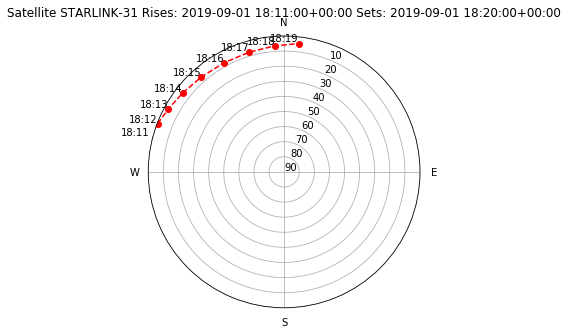

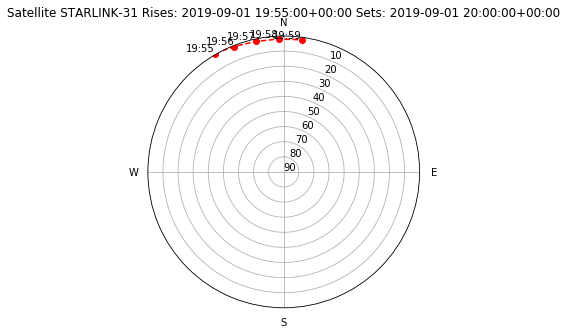

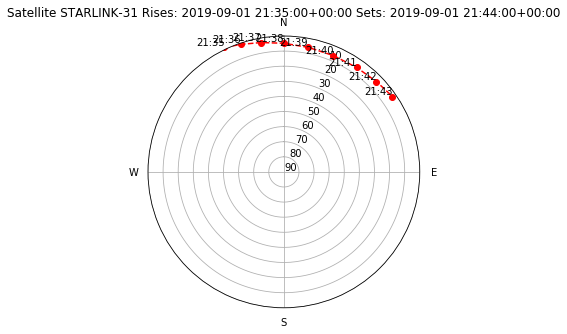

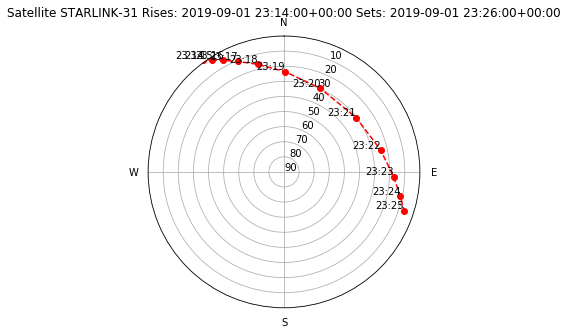

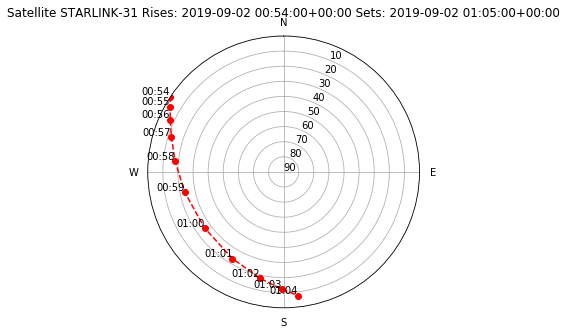

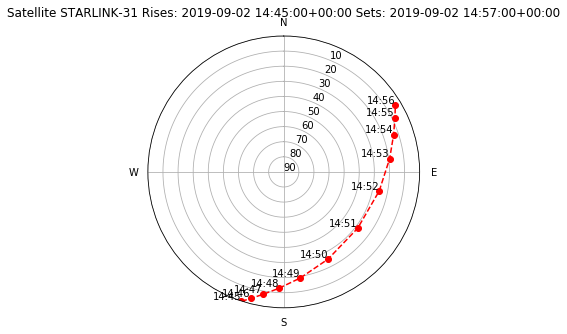

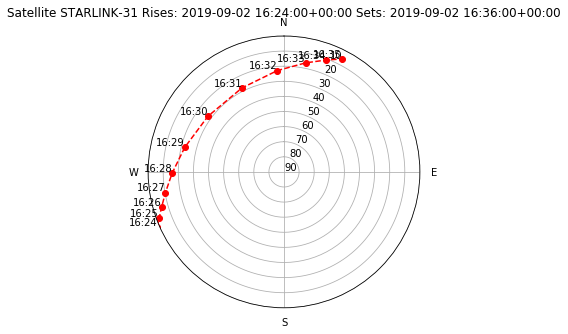

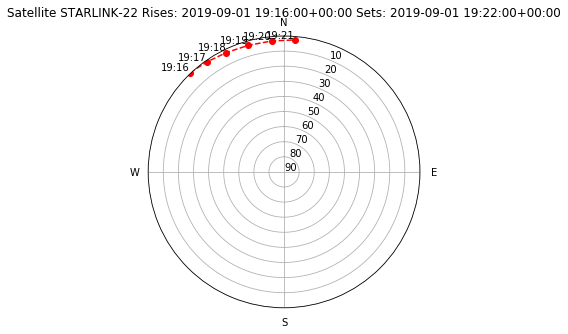

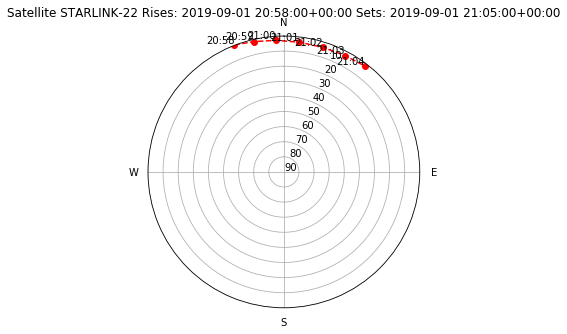

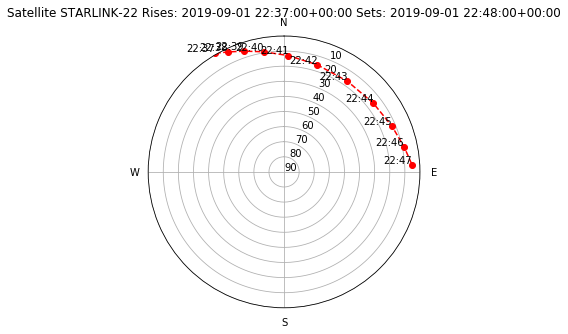

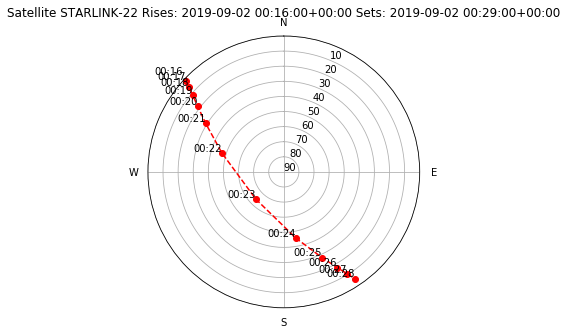

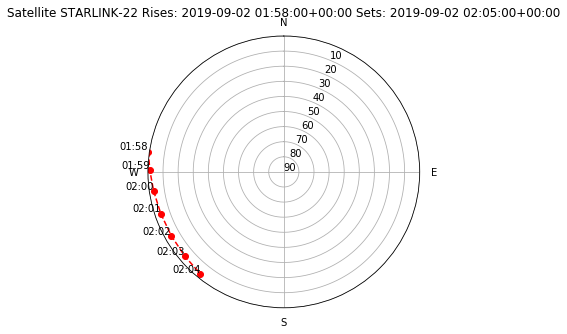

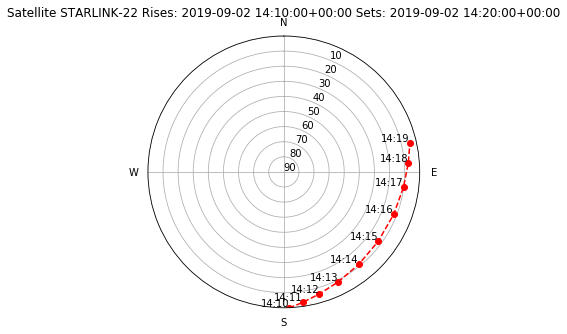

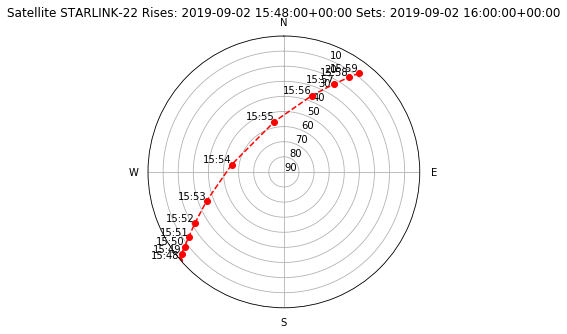

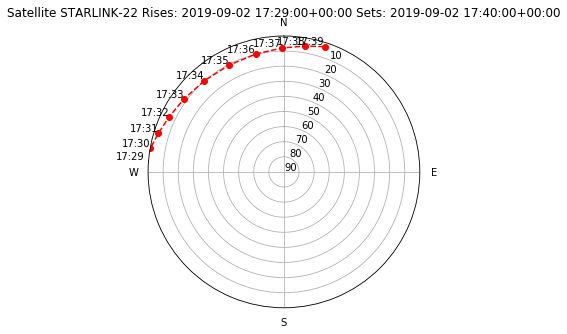

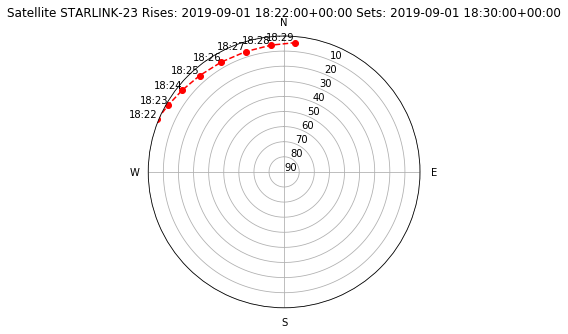

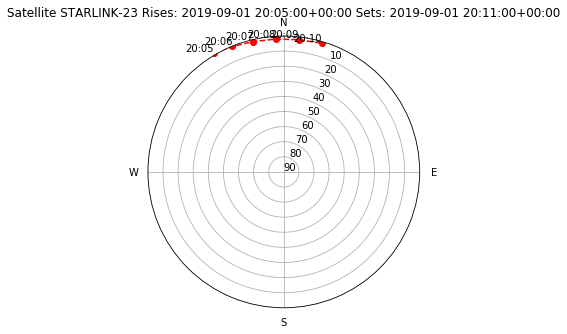

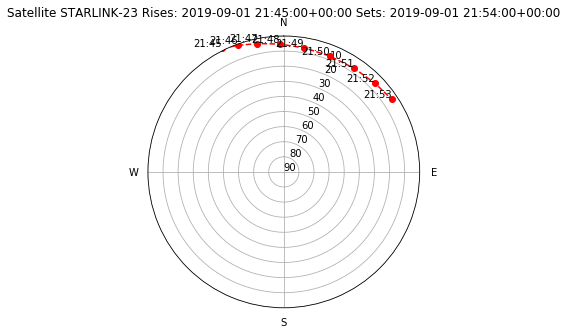

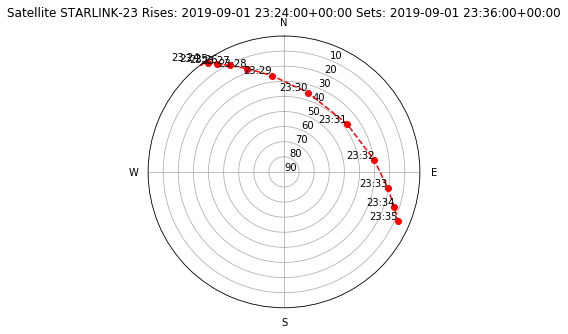

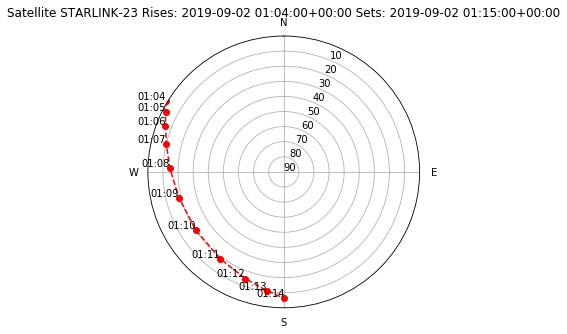

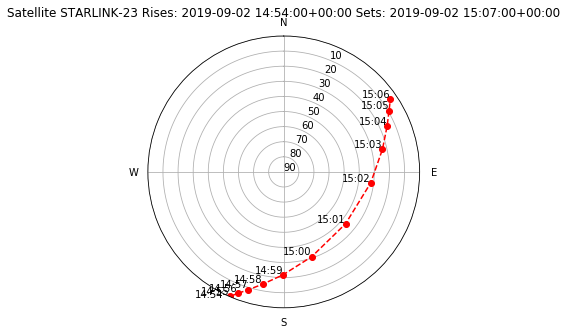

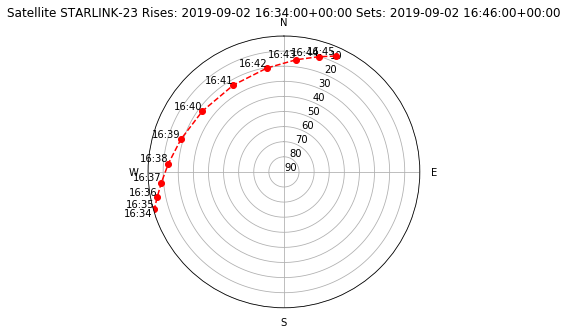

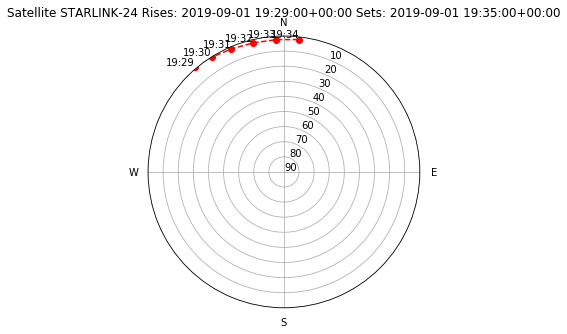

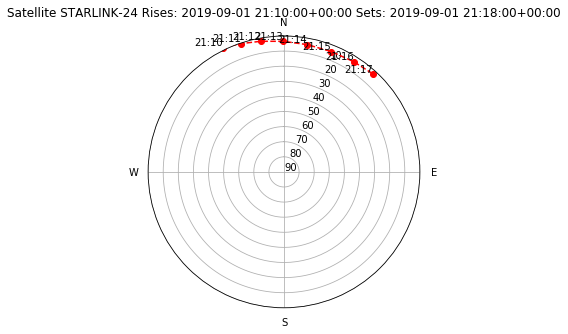

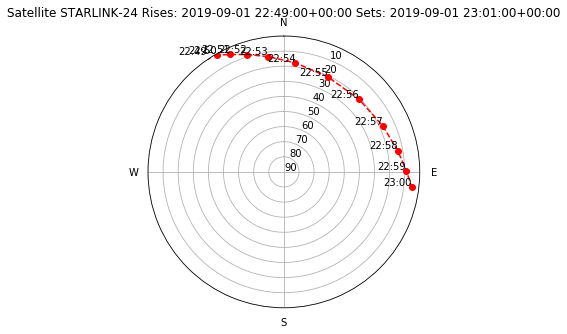

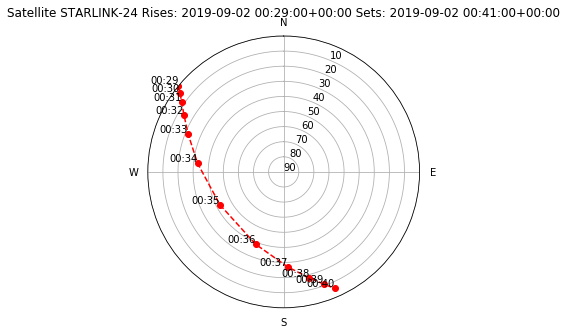

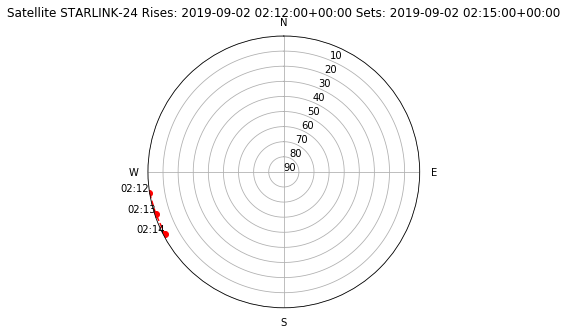

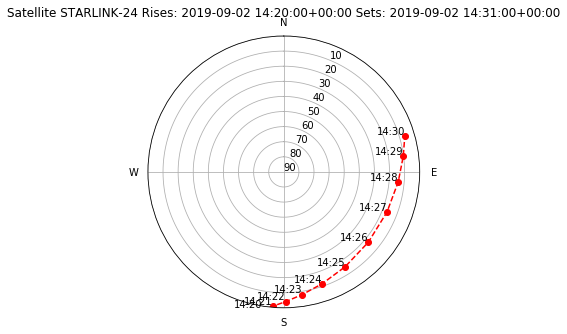

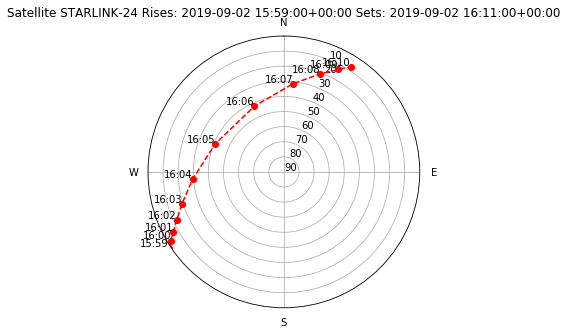

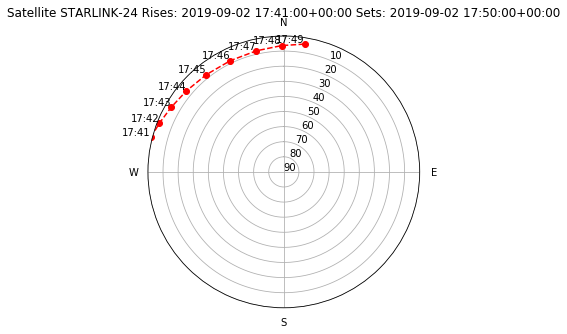

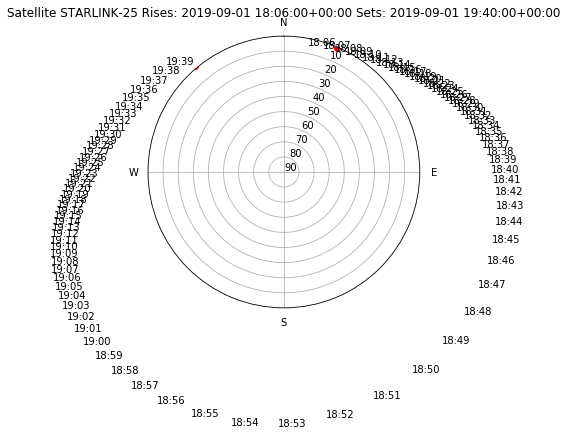

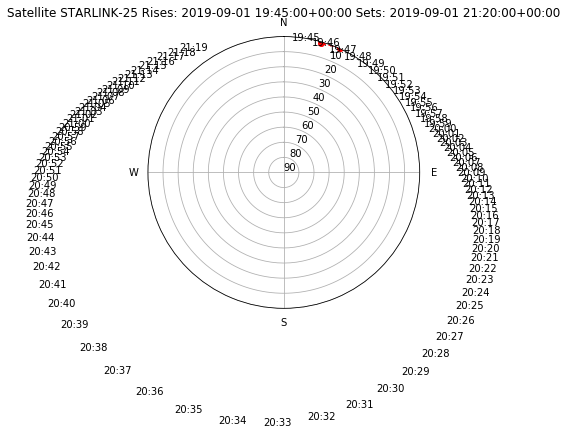

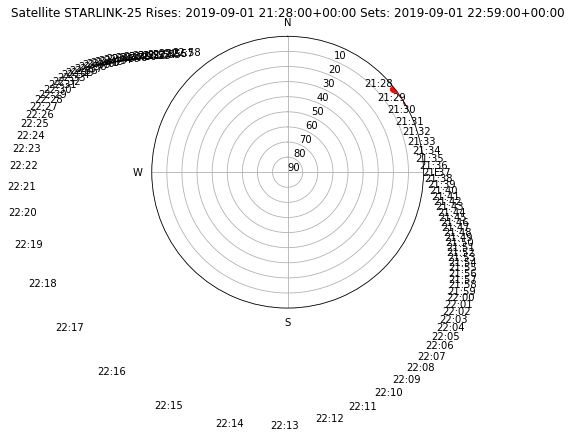

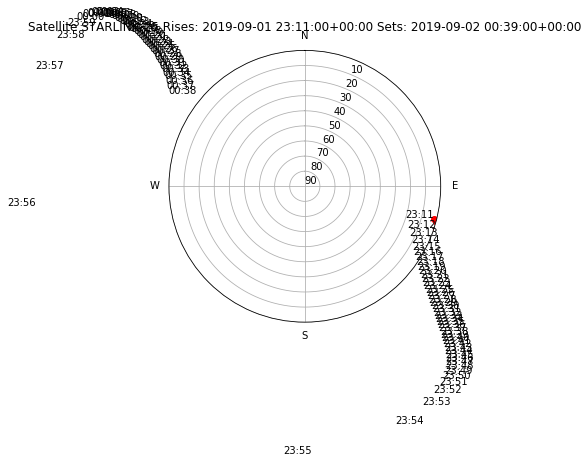

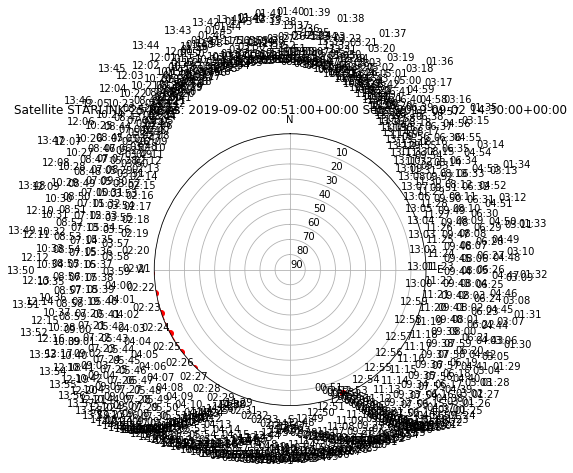

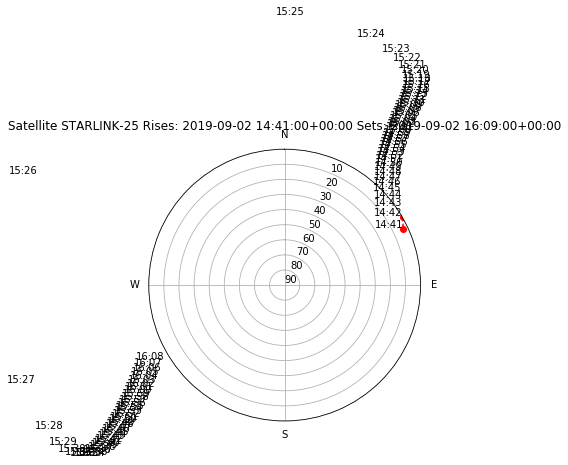

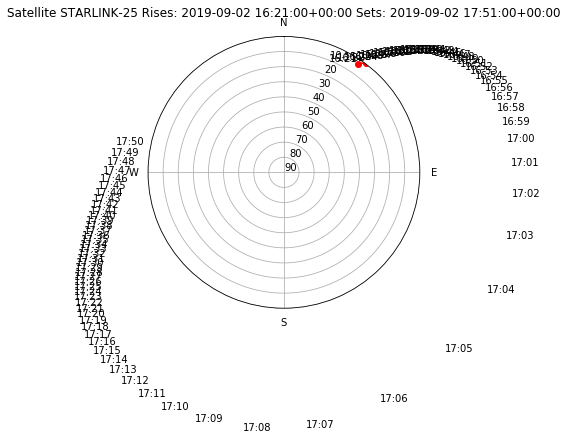

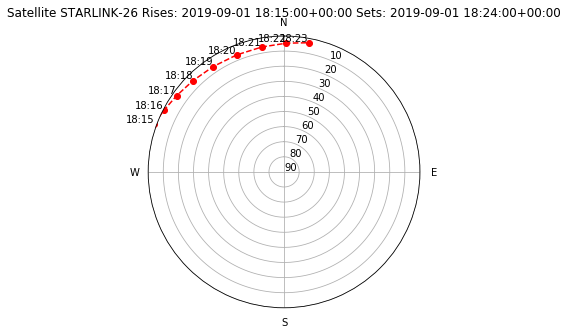

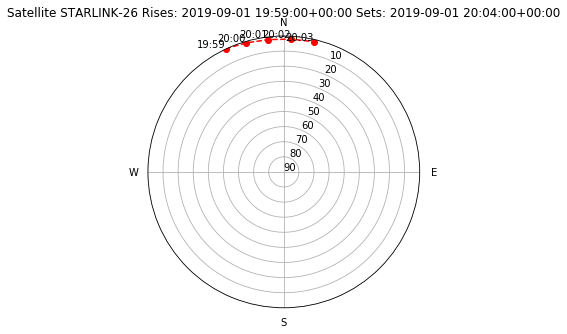

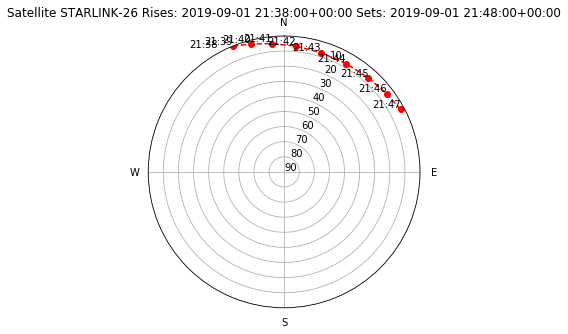

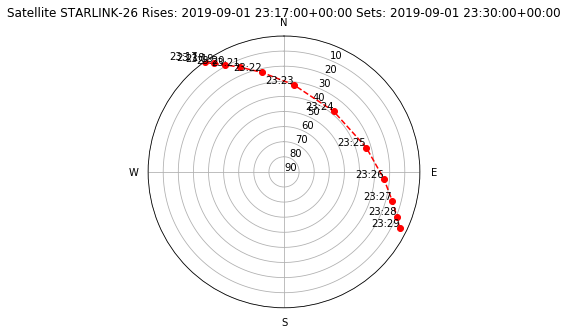

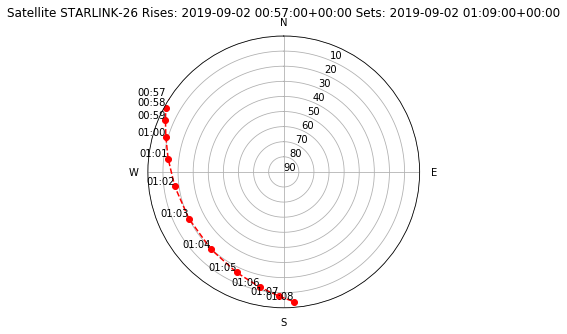

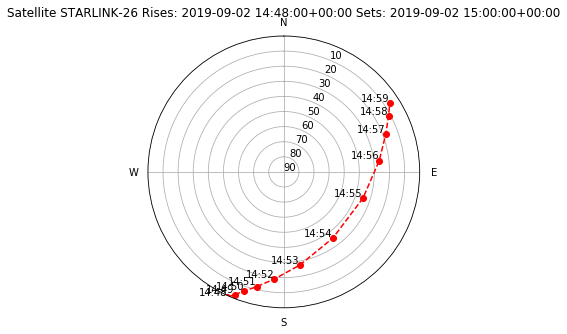

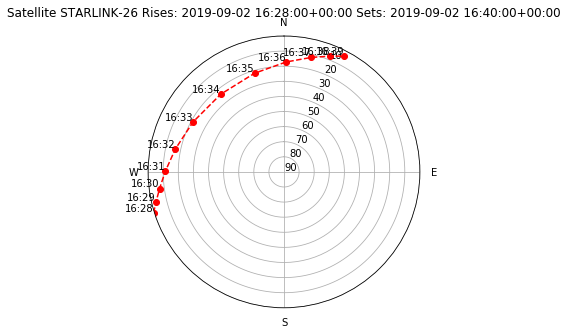

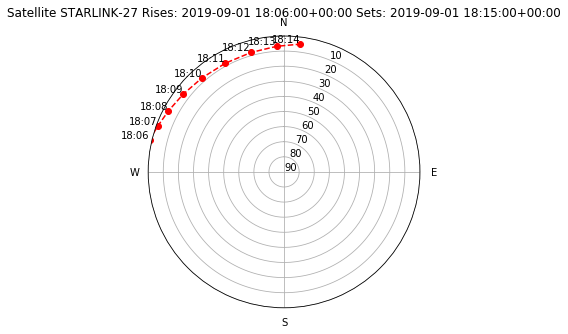

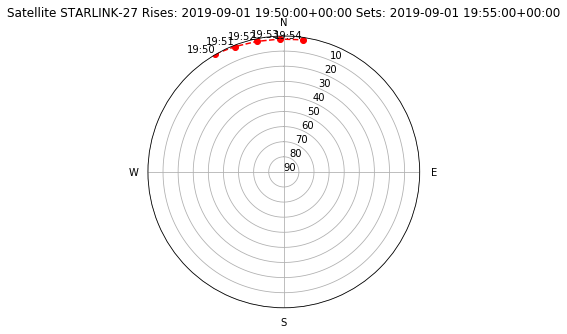

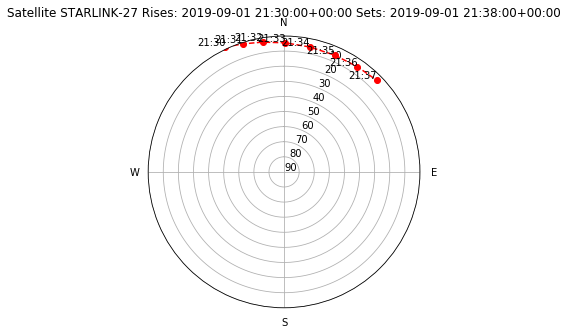

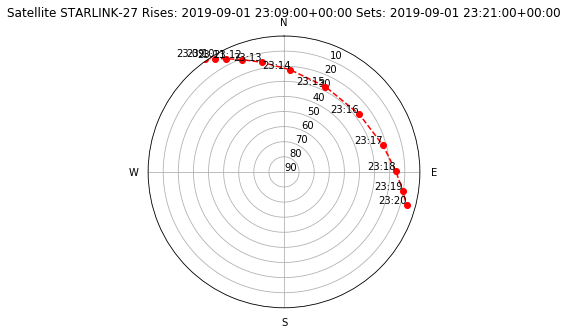

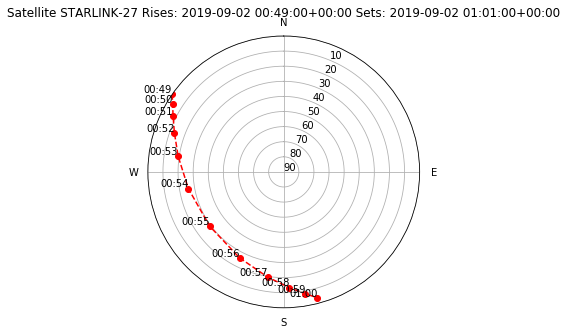

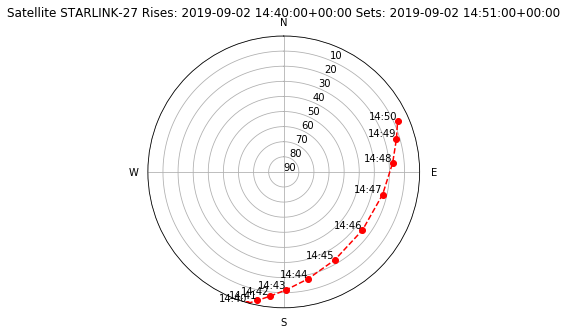

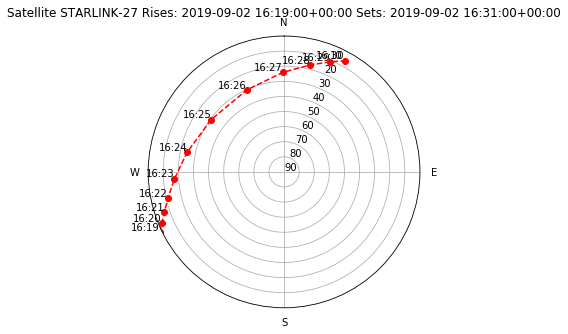

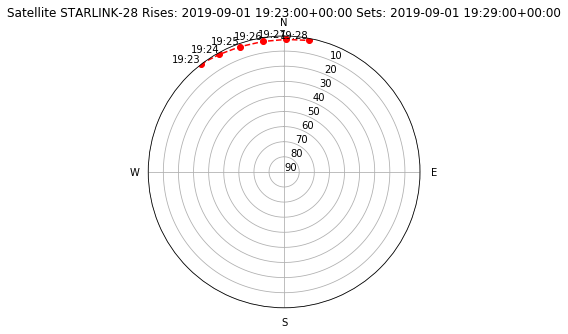

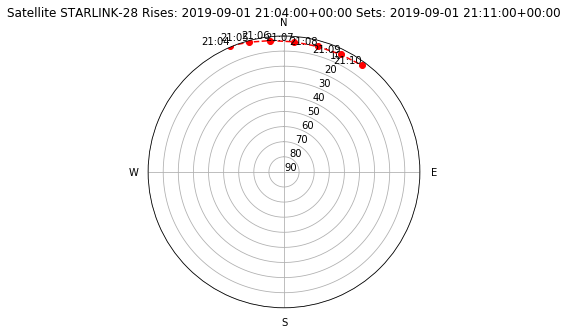

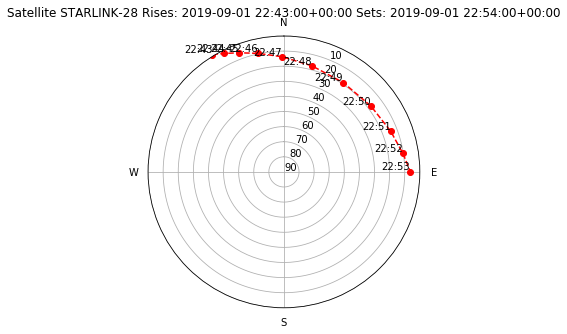

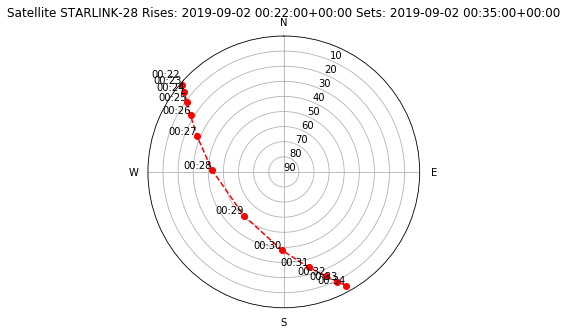

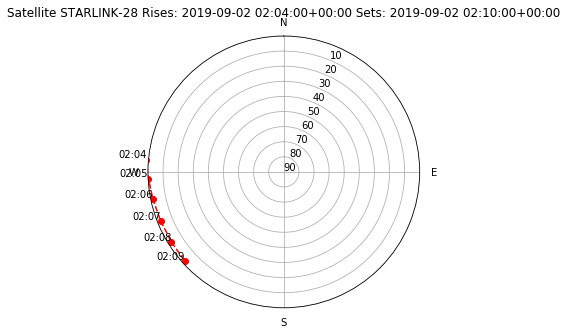

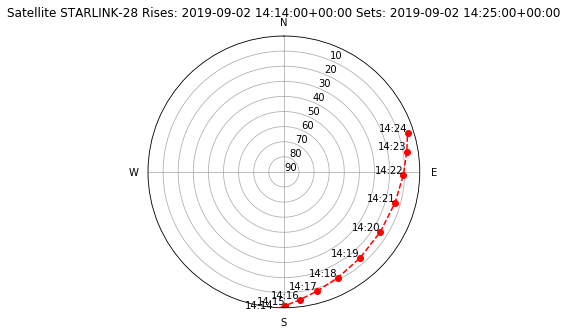

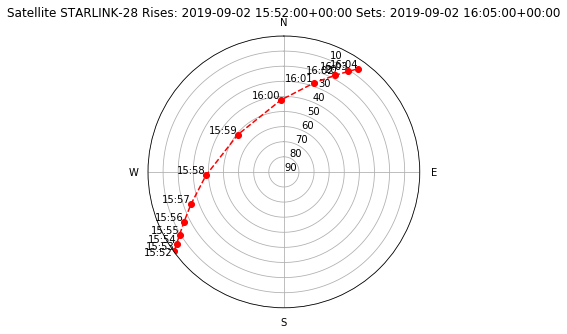

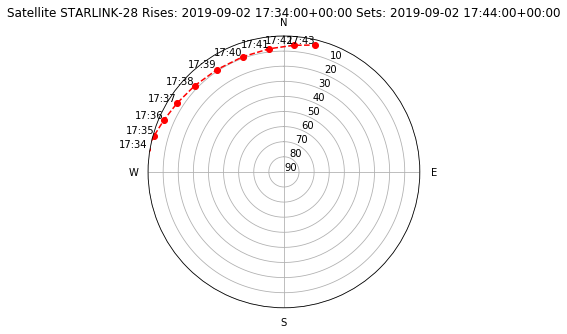

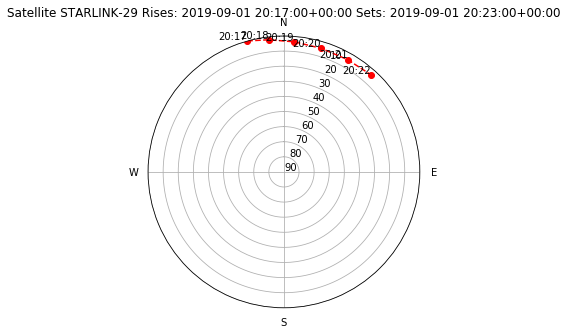

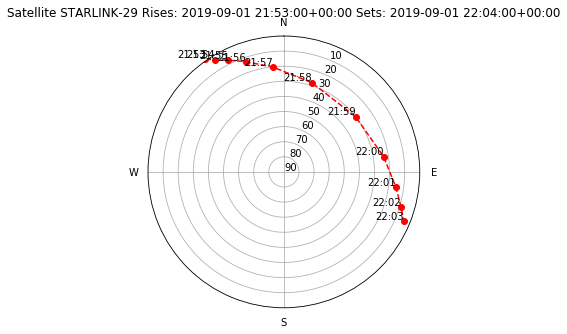

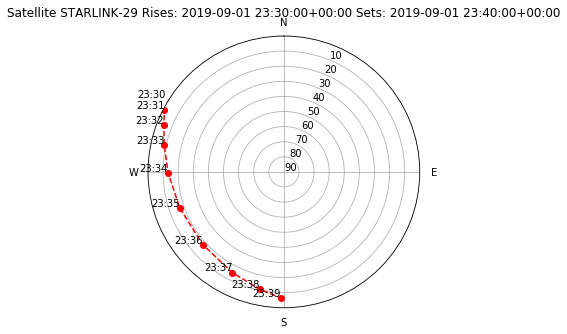

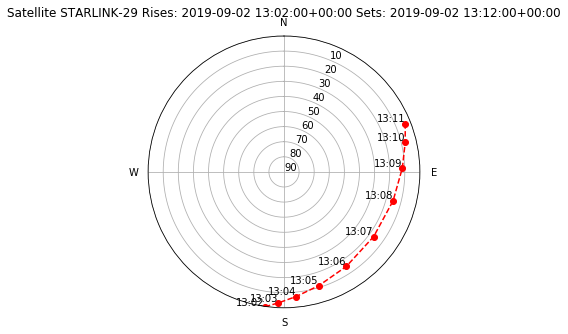

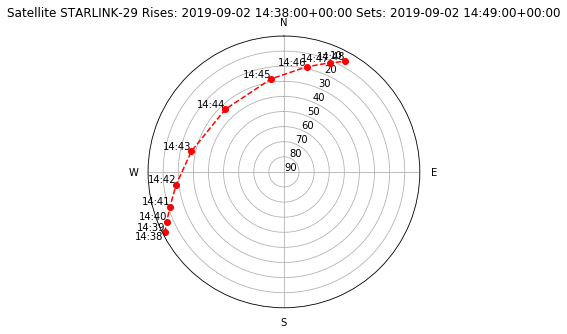

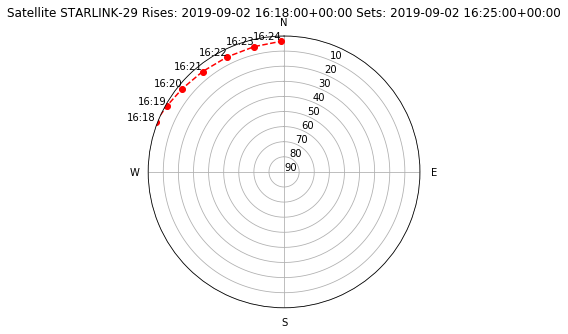

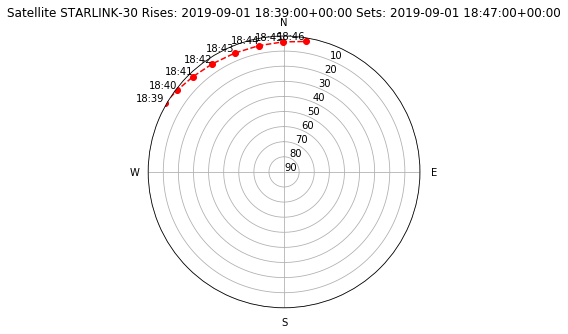

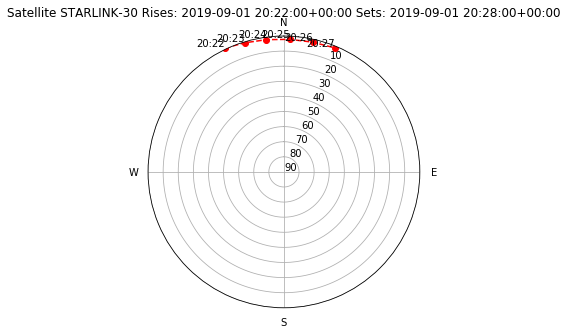

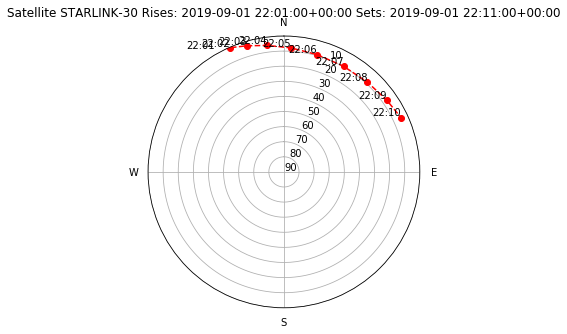

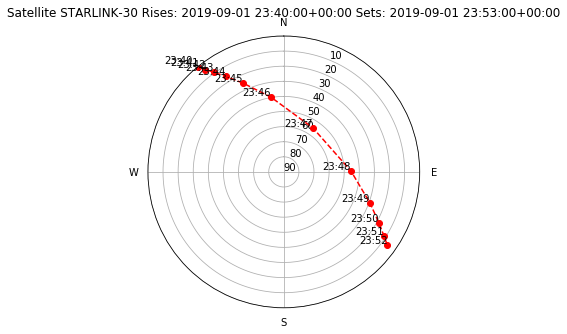

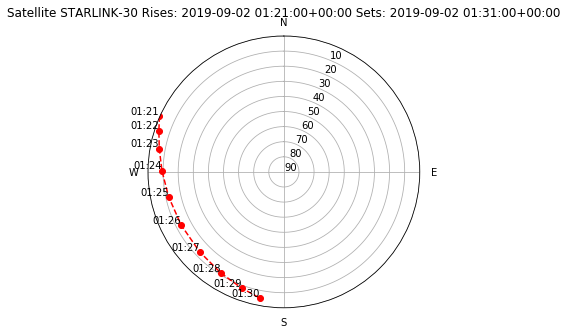

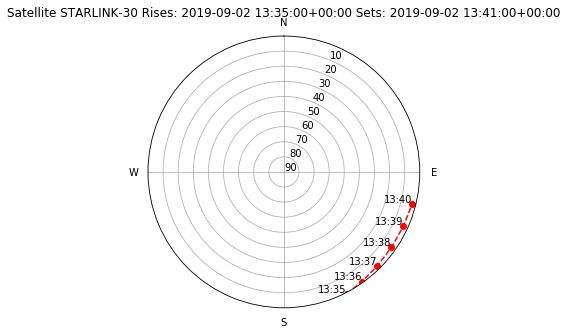

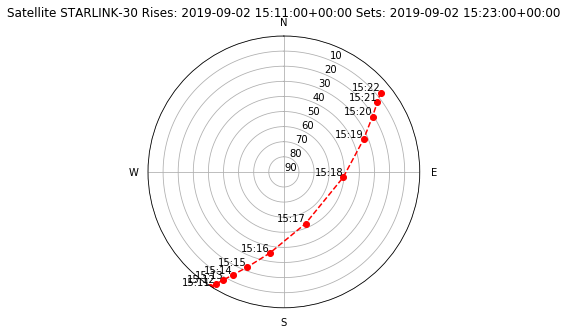

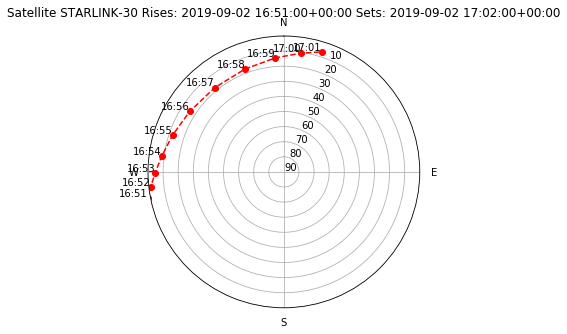

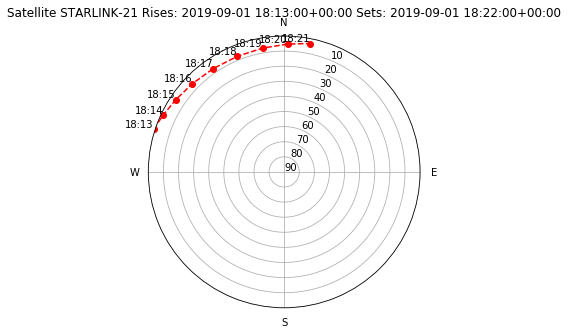

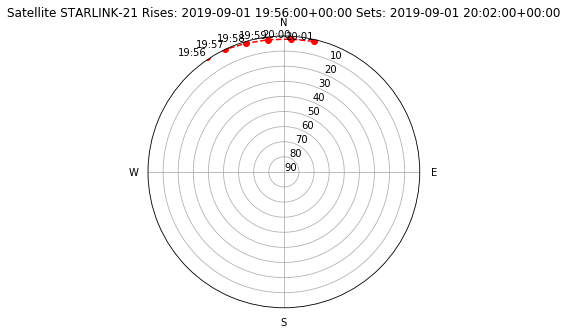

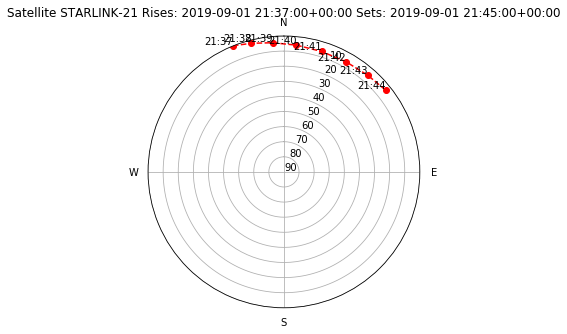

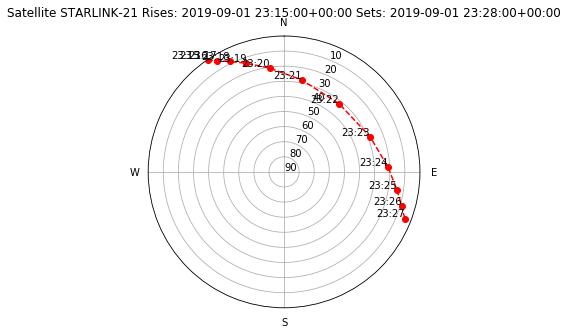

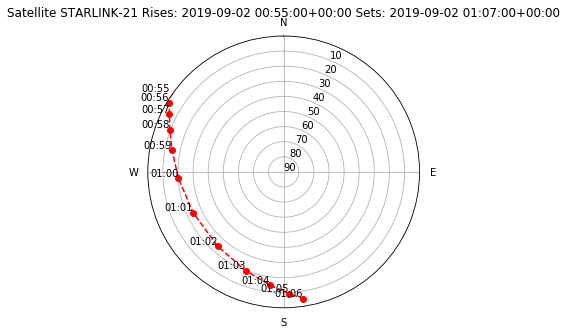

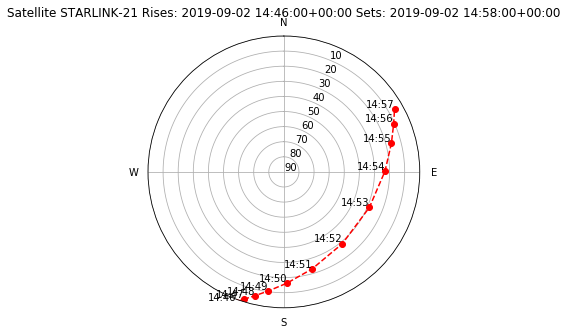

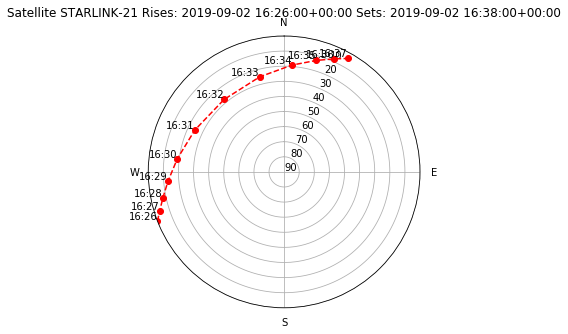

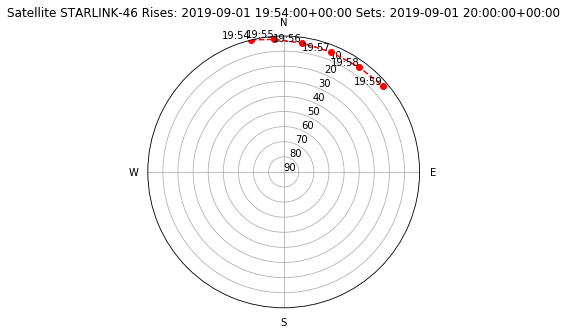

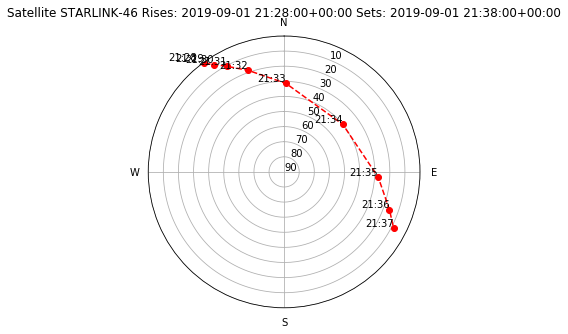

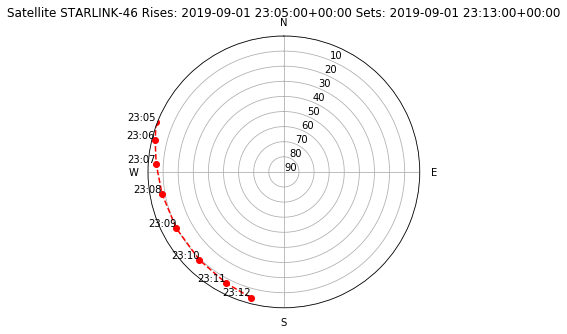

Error in callback <function flush_figures at 0x11eb0df80> (for post_execute):


KeyboardInterrupt: 

In [104]:
for sat in new_sat_names:
    get_passes(1, 9, 1, 18, 31.9599, -111.5997, 2120, 0, sat_name = sat)
    

In [98]:
get_passes(1, 9, 1, 18, 31.9599, -111.5997, 2120, 0, sat_name = 'STARLINK-48')

[   5  100  104  199  207  297  309  396  406 1218 1230 1317 1328 1419
 1426]


ValueError: cannot reshape array of size 15 into shape (7,2)

In [47]:
sats = ['STARLINK-22', 'STARLINK-23', 'STARLINK-24']
get_passes(1, 9, 1, 18, 31.9599, -111.5997, 2120, 0, sat_name = sats[0])


[['STARLINK-24',
  <Angle 1440 values from -88deg 20' 10.5" to 42deg 30' 42.9">,
  <Angle 1440 values from 00deg 08' 02.2" to 359deg 40' 09.5">,
  <Angle 1440 values from 00h 00m 52.25s to 23h 59m 31.41s>,
  <Angle 1440 values from -88deg 38' 59.5" to +84deg 58' 37.8">]]

In [48]:
get_passes(1, 9, 1, 18, 31.9599, -111.5997, 2120, 0, sat_name = sats[1])

[['STARLINK-23',
  <Angle 1440 values from -88deg 57' 00.9" to 37deg 32' 14.7">,
  <Angle 1440 values from 01deg 45' 52.5" to 359deg 46' 00.3">,
  <Angle 1440 values from 00h 00m 22.31s to 23h 59m 07.56s>,
  <Angle 1440 values from -89deg 29' 20.1" to +81deg 19' 16.4">]]

In [49]:
get_passes(1, 9, 1, 18, 31.9599, -111.5997, 2120, 0, sat_name = sats[2])

[['STARLINK-24',
  <Angle 1440 values from -88deg 20' 10.5" to 42deg 30' 42.9">,
  <Angle 1440 values from 00deg 08' 02.2" to 359deg 40' 09.5">,
  <Angle 1440 values from 00h 00m 52.25s to 23h 59m 31.41s>,
  <Angle 1440 values from -88deg 38' 59.5" to +84deg 58' 37.8">]]